### Question
#### *List down the top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold.*

---

## Solution for this problem

### **Steps to Calculate Top 10 States by CAGR (2022–2024)**

1. **Filter the Data for Relevant Years**

   * Keep only rows where `year` is 2022 or 2024.
   * Make sure the sales column contains total vehicles sold (not EV-only, unless the question specifies EVs).

2. **Aggregate Sales by State and Year**

   * Group by `state` and `year`.
   * Sum the `total_vehicles_sold` for each combination.

3. **Pivot or Reshape the Data**

   * Make a table where each row is a state and columns are `2022_sales` and `2024_sales`.

4. **Apply the CAGR Formula**
   For each state:

   $$
   \text{CAGR} = \left( \frac{\text{Sales in 2024}}{\text{Sales in 2022}} \right)^{\frac{1}{n}} - 1
   $$

   Here, $n = 2$ years (from 2022 to 2024).

5. **Handle Missing or Zero Values**

   * If a state has `2022_sales = 0`, you can either:

     * Skip it (CAGR undefined), or
     * Use a special note (infinite growth) if your context allows.

6. **Sort the Results**

   * Sort by `CAGR` in descending order.

7. **Select Top 10 States**

   * Pick the first 10 states after sorting.

8. **Format the Output**

   * Show a table with `state`, `2022_sales`, `2024_sales`, and `CAGR (%)`.

In [1]:
# Importing necessary libraries for data manupulation and data visualizaion

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt
from IPython.display import display

In [2]:
# Load a state based ev sales dataframe
state_sales = pd.read_csv("../../data/processed/electric_vehicle_sales_by_state.csv")

# display the first 5 dataset from state_sales
display(state_sales.head())

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361
2,01-May-21,Sikkim,2-Wheelers,0,113
3,01-May-21,Sikkim,4-Wheelers,0,98
4,01-Jun-21,Sikkim,2-Wheelers,0,229


In [3]:
dim_date = pd.read_csv("../../data/raw/dim_date.csv")

display(dim_date.head())

,date,fiscal_year,quarter
0,01-Apr-21,2022,Q1
1,01-May-21,2022,Q1
2,01-Jun-21,2022,Q1
3,01-Jul-21,2022,Q2
4,01-Aug-21,2022,Q2


In [4]:
merge_df = pd.merge(dim_date, state_sales, on="date", how='left')

display(merge_df)
display(merge_df[merge_df['fiscal_year'] == '2024'])

,date,fiscal_year,quarter,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,2022,Q1,Sikkim,2-Wheelers,0,398
1,01-Apr-21,2022,Q1,Sikkim,4-Wheelers,0,361
2,01-Apr-21,2022,Q1,Andaman & Nicobar Island,2-Wheelers,0,515
3,01-Apr-21,2022,Q1,Arunachal Pradesh,2-Wheelers,0,1256
4,01-Apr-21,2022,Q1,Arunachal Pradesh,4-Wheelers,0,724
...,...,...,...,...,...,...,...
2440,01-Mar-24,2024,Q4,Mizoram,2-Wheelers,58,1932
2441,01-Mar-24,2024,Q4,DNH and DD,2-Wheelers,25,780
2442,01-Mar-24,2024,Q4,Manipur,2-Wheelers,13,1394
2443,01-Mar-24,2024,Q4,Andaman & Nicobar Island,2-Wheelers,2,447


,date,fiscal_year,quarter,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold


In [5]:
display(merge_df['fiscal_year'].unique())

array([2022, 2023, 2024])

In [6]:
# Filtering out the dataset
state_sales_filtered = merge_df.loc[merge_df['fiscal_year'].isin([2022, 2024])]

state_sales_filtered.head()


,date,fiscal_year,quarter,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,2022,Q1,Sikkim,2-Wheelers,0,398
1,01-Apr-21,2022,Q1,Sikkim,4-Wheelers,0,361
2,01-Apr-21,2022,Q1,Andaman & Nicobar Island,2-Wheelers,0,515
3,01-Apr-21,2022,Q1,Arunachal Pradesh,2-Wheelers,0,1256
4,01-Apr-21,2022,Q1,Arunachal Pradesh,4-Wheelers,0,724


In [7]:
state_sales_filtered['fiscal_year'].unique()

array([2022, 2024])

In [8]:
state_sales_filtered['state'] = state_sales_filtered['state'].replace({
  'Andaman & Nicobar Island': 'Andaman & Nicobar'
})

# Aggregate Sales by state and year
state_sales_grouped = (
  state_sales_filtered.groupby(['state', 'fiscal_year'], as_index=False)['total_vehicles_sold'].sum()
) 

display(state_sales_grouped)

/tmp/ipykernel_166463/1051267921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_sales_filtered['state'] = state_sales_filtered['state'].replace({


,state,fiscal_year,total_vehicles_sold
0,Andaman & Nicobar,2022,5148
1,Andaman & Nicobar,2024,7203
2,Andhra Pradesh,2022,772748
3,Andhra Pradesh,2024,782865
4,Arunachal Pradesh,2022,19929
...,...,...,...
63,Uttar Pradesh,2024,2932347
64,Uttarakhand,2022,173331
65,Uttarakhand,2024,233111
66,West Bengal,2022,860709


In [9]:
state_sales_grouped['fiscal_year'].unique()

array([2022, 2024])

In [10]:
state_sales_pivot = (
    state_sales_grouped.pivot(
      index='state',
      columns='fiscal_year',
      values='total_vehicles_sold'
    )
  .rename(columns={2022: 'sales_2022', 2024: 'sales_2024'})
  .reset_index()
)

display(state_sales_pivot.head())

fiscal_year,state,sales_2022,sales_2024
0,Andaman & Nicobar,5148,7203
1,Andhra Pradesh,772748,782865
2,Arunachal Pradesh,19929,27892
3,Assam,379450,547626
4,Bihar,892873,1132703


In [11]:
# Calculate CAGR ( n = 2years)
state_sales_pivot['CAGR'] = (
  (state_sales_pivot['sales_2024'] / state_sales_pivot['sales_2022']) ** (1/2) - 1
) * 100

display(state_sales_pivot.head())

fiscal_year,state,sales_2022,sales_2024,CAGR
0,Andaman & Nicobar,5148,7203,18.287115
1,Andhra Pradesh,772748,782865,0.652483
2,Arunachal Pradesh,19929,27892,18.303359
3,Assam,379450,547626,20.133672
4,Bihar,892873,1132703,12.632359


In [12]:
# 5. Handle division by zero or missing data
state_sales_pivot = state_sales_pivot.dropna(subset=['sales_2022', 'sales_2024'])
state_sales_pivot = state_sales_pivot[state_sales_pivot['sales_2022'] > 0]

In [13]:
# 6. Sort by CAGR descending
state_cagr_top10 = state_sales_pivot.sort_values('CAGR', ascending=False).head(10)

In [14]:
state_cagr_top10

fiscal_year,state,sales_2022,sales_2024,CAGR
21,Meghalaya,22193,36628,28.469075
9,Goa,48372,78524,27.410196
15,Karnataka,1007894,1581988,25.283582
8,Delhi,401540,606348,22.884347
27,Rajasthan,880985,1300476,21.497380
10,Gujarat,1094872,1590987,20.545677
3,Assam,379450,547626,20.133672
22,Mizoram,19439,27422,18.771599
2,Arunachal Pradesh,19929,27892,18.303359
0,Andaman & Nicobar,5148,7203,18.287115


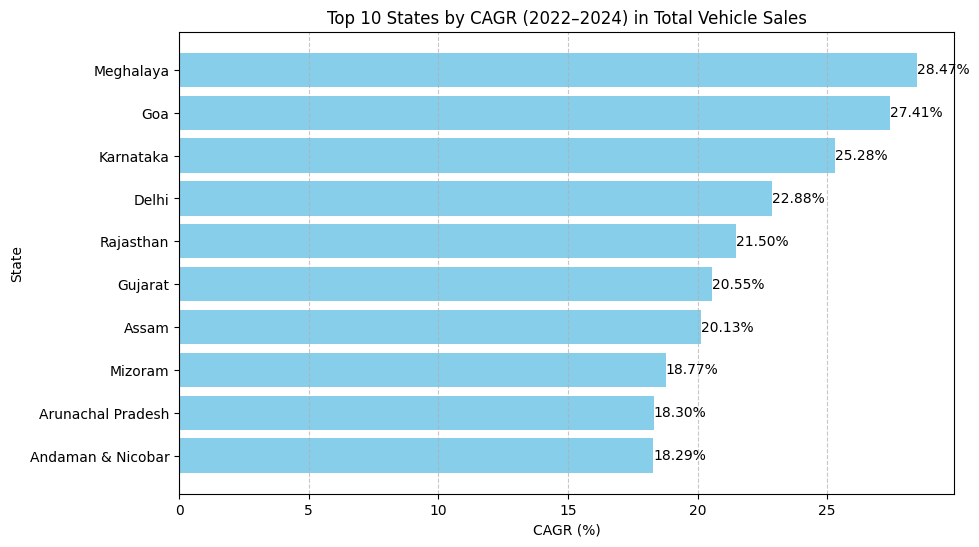

In [15]:
import matplotlib.pyplot as plt

# Sort again to plot in correct order
df_top10_sorted = state_cagr_top10.sort_values('CAGR')

plt.figure(figsize=(10,6))
plt.barh(df_top10_sorted['state'], df_top10_sorted['CAGR'], color='skyblue')
plt.xlabel('CAGR (%)')
plt.ylabel('State')
plt.title('Top 10 States by CAGR (2022–2024) in Total Vehicle Sales')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Optional: Add labels to bars
for index, value in enumerate(df_top10_sorted['CAGR']):
    plt.text(value, index, f"{value:.2f}%", va='center')

plt.show()


Between 2022 and 2024, Meghalaya led vehicle sales growth with a remarkable 28.47% CAGR, followed by Goa (27.41%) and Karnataka (25.28%). Other top performers included Delhi (22.88%) and Rajasthan (21.50%).

Notably, these states showed consistent growth in both overall vehicle sales and electric vehicle adoption:

- Meghalaya's exceptional performance included 476.63% CAGR in EV sales
- Goa achieved 146.45% CAGR in the EV segment
- Karnataka recorded 93.24% EV sales growth

The positive growth in both segments suggests effective policies and market conditions supporting automotive sector expansion, particularly in EV adoption. This trend indicates these regions could serve as models for other states aiming to boost their automotive markets.

For stakeholders, these states represent high-potential markets for both traditional and electric vehicles, warranting focused investment and market development strategies.

>From 2022 to 2024, vehicle sales declined across all states, but some regions showed greater resilience. Nagaland led with the smallest drop at -37.81% CAGR, followed by Puducherry and Assam. These states outperformed the national trend, signaling pockets of stable demand despite market challenges. Targeted efforts here could yield quicker recovery compared to other regions."

### Let Get the CAGR of EV Vehicles from 2022 - 2024

In [16]:
ev_sal_state = state_sales_filtered.groupby(['fiscal_year', 'state'])['electric_vehicles_sold'].sum().reset_index()


zero_counts = (ev_sal_state == 0).sum()
display(zero_counts)

ev_sal_state = ev_sal_state[ev_sal_state['electric_vehicles_sold'] != 0]

display(ev_sal_state.head())

display(ev_sal_state['fiscal_year'].unique())

fiscal_year               0
state                     0
electric_vehicles_sold    4
dtype: int64

,fiscal_year,state,electric_vehicles_sold
0,2022,Andaman & Nicobar,22
1,2022,Andhra Pradesh,13928
3,2022,Assam,730
4,2022,Bihar,4829
5,2022,Chandigarh,411


array([2022, 2024])

In [17]:
ev_state_pt = (
  ev_sal_state.pivot(index='state', columns='fiscal_year', values='electric_vehicles_sold')
  .rename(columns={2022: 'sales_2022', 2024: 'sales_2024'})
  .reset_index()
)

display(ev_state_pt.head())

fiscal_year,state,sales_2022,sales_2024
0,Andaman & Nicobar,22.0,35.0
1,Andhra Pradesh,13928.0,33183.0
2,Arunachal Pradesh,NaN,31.0
3,Assam,730.0,3497.0
4,Bihar,4829.0,15069.0


In [18]:
# Calculate the CAGR of EV_sales
ev_state_pt['CAGR'] = (
  (
    (ev_state_pt['sales_2024'] / ev_state_pt['sales_2022']) ** (1/2) - 1 
  ) * 100
).round(2) # in %

display(ev_state_pt[ev_state_pt['CAGR'] > 0])

fiscal_year,state,sales_2022,sales_2024,CAGR
0,Andaman & Nicobar,22.0,35.0,26.13
1,Andhra Pradesh,13928.0,33183.0,54.35
3,Assam,730.0,3497.0,118.87
4,Bihar,4829.0,15069.0,76.65
5,Chandigarh,411.0,2877.0,164.58
6,Chhattisgarh,4534.0,28540.0,150.89
7,DNH and DD,35.0,198.0,137.85
8,Delhi,16535.0,46724.0,68.10
9,Goa,1778.0,10799.0,146.45
10,Gujarat,18026.0,84359.0,116.33


In [19]:
# Handle division by zero
ev_state_pt = ev_state_pt.dropna(subset=['sales_2022', 'sales_2024'])
ev_state_pt = ev_state_pt.loc[ev_state_pt['sales_2022'] > 0]

In [20]:
# Sort by CAGR in decending order
top_10_ev_CAGR = ev_state_pt.sort_values(by='CAGR', ascending=False).head(10)

display(top_10_ev_CAGR)

fiscal_year,state,sales_2022,sales_2024,CAGR
21,Meghalaya,4.0,133.0,476.63
29,Tripura,28.0,304.0,229.50
23,Nagaland,1.0,9.0,200.00
5,Chandigarh,411.0,2877.0,164.58
6,Chhattisgarh,4534.0,28540.0,150.89
32,West Bengal,2685.0,16864.0,150.62
9,Goa,1778.0,10799.0,146.45
7,DNH and DD,35.0,198.0,137.85
30,Uttar Pradesh,10222.0,57758.0,137.70
18,Madhya Pradesh,7916.0,43223.0,133.67


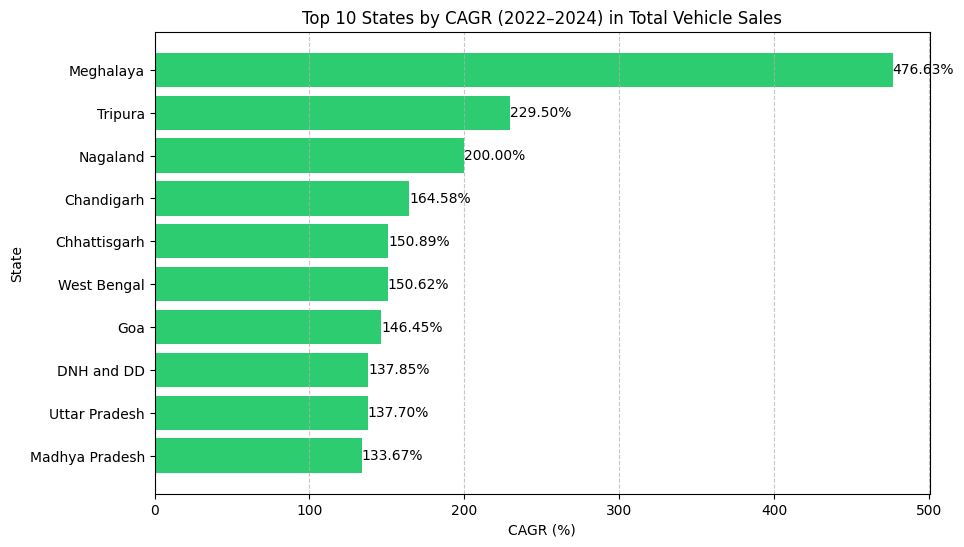

In [21]:
# Sort for plotting
df_top10_sorted = top_10_ev_CAGR.sort_values("CAGR")

# Create color mapping: green if positive, red if negative
colors = ["#2ecc71" if val > 0 else "#e74c3c" for val in df_top10_sorted["CAGR"]]

plt.figure(figsize=(10, 6))
plt.barh(df_top10_sorted["state"], df_top10_sorted["CAGR"], color=colors)
plt.xlabel("CAGR (%)")
plt.ylabel("State")
plt.title("Top 10 States by CAGR (2022–2024) in Total Vehicle Sales")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Add labels to bars
for index, value in enumerate(df_top10_sorted["CAGR"]):
    plt.text(value, index, f"{value:.2f}%", va="center");

### Showing the top 10 listed state which having other then ev_sales CAGR

In [22]:
# Calculate non-EV sales by subtracting EV sales from total sales
state_sales_filtered['none_ev_sales'] = state_sales_filtered['total_vehicles_sold'] - state_sales_filtered['electric_vehicles_sold']

# Display rows where EV sales are greater than 0
display(state_sales_filtered.loc[state_sales_filtered['electric_vehicles_sold'] > 0])

# Display statistical summary of numeric columns
display(state_sales_filtered[['electric_vehicles_sold', 'none_ev_sales']].describe())

/tmp/ipykernel_166463/1335137374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_sales_filtered['none_ev_sales'] = state_sales_filtered['total_vehicles_sold'] - state_sales_filtered['electric_vehicles_sold']


,date,fiscal_year,quarter,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,none_ev_sales
20,01-Apr-21,2022,Q1,DNH and DD,2-Wheelers,1,657,656
21,01-Apr-21,2022,Q1,Himachal Pradesh,4-Wheelers,1,3544,3543
22,01-Apr-21,2022,Q1,Meghalaya,4-Wheelers,1,930,929
23,01-Apr-21,2022,Q1,Andaman & Nicobar,4-Wheelers,9,168,159
24,01-Apr-21,2022,Q1,Andhra Pradesh,4-Wheelers,26,7837,7811
...,...,...,...,...,...,...,...,...
2440,01-Mar-24,2024,Q4,Mizoram,2-Wheelers,58,1932,1874
2441,01-Mar-24,2024,Q4,DNH and DD,2-Wheelers,25,780,755
2442,01-Mar-24,2024,Q4,Manipur,2-Wheelers,13,1394,1381
2443,01-Mar-24,2024,Q4,Andaman & Nicobar,2-Wheelers,2,447,445


,electric_vehicles_sold,none_ev_sales
count,1629.000000,1629.000000
mean,792.352977,22288.723143
std,2190.583536,36923.982026
min,0.000000,-570.000000
25%,2.000000,1111.000000
50%,51.000000,5815.000000
75%,493.000000,27893.000000
max,26668.000000,382656.000000


In [23]:
df_grouped = state_sales_filtered.groupby(['fiscal_year', 'state'], as_index=False)['none_ev_sales'].sum()

display(df_grouped.head())

,fiscal_year,state,none_ev_sales
0,2022,Andaman & Nicobar,5126
1,2022,Andhra Pradesh,758820
2,2022,Arunachal Pradesh,19929
3,2022,Assam,378720
4,2022,Bihar,888044


In [24]:
# pivot
df_pivot = (
  df_grouped.pivot(index='state', columns='fiscal_year', values='none_ev_sales')
  .rename(columns={2022: 'sales_2022', 2024: 'sales_2024'})
  .reset_index()
)

display(df_pivot.head())

fiscal_year,state,sales_2022,sales_2024
0,Andaman & Nicobar,5126,7168
1,Andhra Pradesh,758820,749682
2,Arunachal Pradesh,19929,27861
3,Assam,378720,544129
4,Bihar,888044,1117634


In [25]:
# ev_state_pt['CAGR'] = (
#   (
#     (ev_state_pt['sales_2024'] / ev_state_pt['sales_2022']) ** (1/2) - 1
#   ) * 100
# ).round(2) # in %

df_pivot["CAGR"] = (
    ((df_pivot["sales_2024"] / df_pivot["sales_2022"]) ** (1 / 2) - 1) * 100
).round(
    2
) 


display(df_pivot.head())

fiscal_year,state,sales_2022,sales_2024,CAGR
0,Andaman & Nicobar,5126,7168,18.25
1,Andhra Pradesh,758820,749682,-0.60
2,Arunachal Pradesh,19929,27861,18.24
3,Assam,378720,544129,19.86
4,Bihar,888044,1117634,12.18


In [26]:
display(df_pivot.isna().sum())
display(df_pivot.isnull().sum())


df_pivot = df_pivot[df_pivot['sales_2022'] > 0]

fiscal_year
state         0
sales_2022    0
sales_2024    0
CAGR          0
dtype: int64

fiscal_year
state         0
sales_2022    0
sales_2024    0
CAGR          0
dtype: int64

In [27]:
df_top10 = df_pivot.sort_values(by='CAGR', ascending=False).head(10)

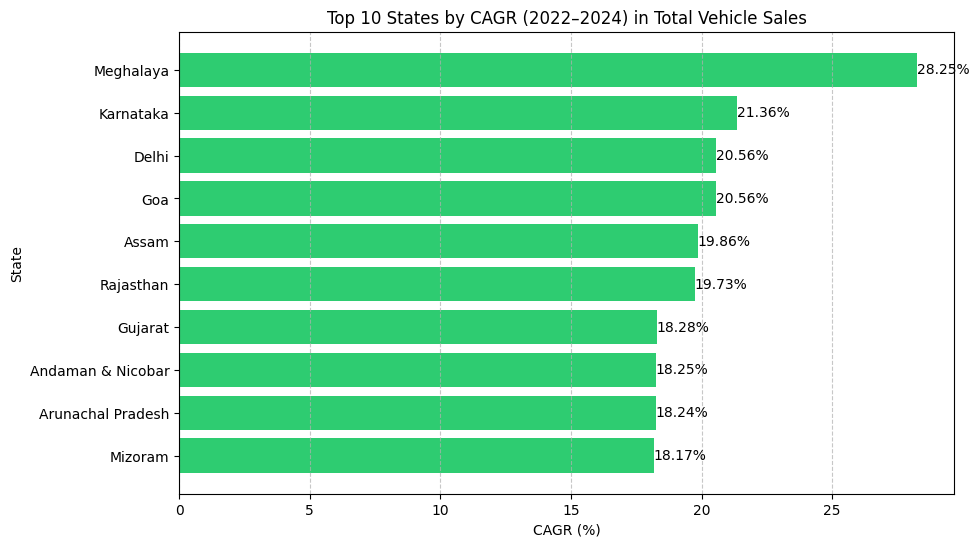

In [28]:
# Sort for plotting
df_top10_sorted = df_top10.sort_values("CAGR")

# Create color mapping: green if positive, red if negative
colors = ["#2ecc71" if val > 0 else "#e74c3c" for val in df_top10_sorted["CAGR"]]

plt.figure(figsize=(10, 6))
plt.barh(df_top10_sorted["state"], df_top10_sorted["CAGR"], color=colors)
plt.xlabel("CAGR (%)")
plt.ylabel("State")
plt.title("Top 10 States by CAGR (2022–2024) in Total Vehicle Sales")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Add labels to bars
for index, value in enumerate(df_top10_sorted["CAGR"]):
    plt.text(value, index, f"{value:.2f}%", va="center");

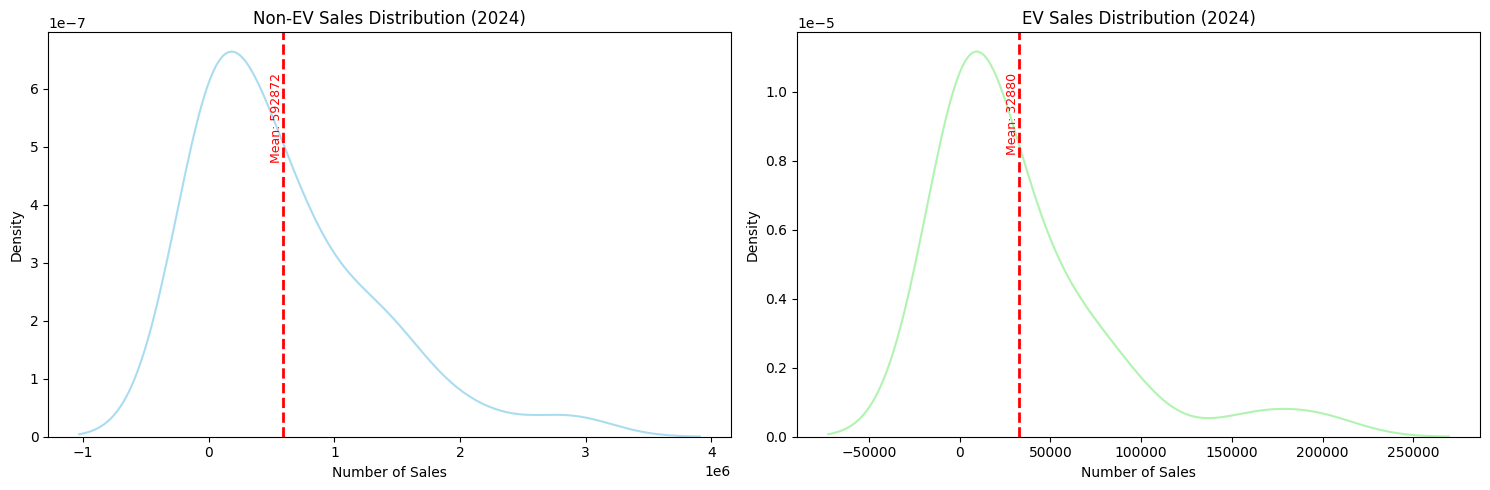

In [29]:
# Calculate means
mean_non_ev = df_pivot['sales_2024'].mean()
mean_ev = ev_state_pt['sales_2024'].mean()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Non-EV sales distribution with density curve
sns.kdeplot(data=df_pivot['sales_2024'], alpha=0.7, color='skyblue', ax=ax1)
ax1.axvline(mean_non_ev, color='red', linestyle='--', linewidth=2)
ax1.text(mean_non_ev, ax1.get_ylim()[1]*0.9, f"Mean: {mean_non_ev:.0f}",
         color='red', rotation=90, va='top', ha='right', fontsize=9)
ax1.set_title('Non-EV Sales Distribution (2024)')
ax1.set_xlabel('Number of Sales')
ax1.set_ylabel('Density')

# EV sales distribution with density curve
sns.kdeplot(data=ev_state_pt['sales_2024'], alpha=0.7, color='lightgreen', ax=ax2)
ax2.axvline(mean_ev, color='red', linestyle='--', linewidth=2)
ax2.text(mean_ev, ax2.get_ylim()[1]*0.9, f"Mean: {mean_ev:.0f}",
         color='red', rotation=90, va='top', ha='right', fontsize=9)
ax2.set_title('EV Sales Distribution (2024)') 
ax2.set_xlabel('Number of Sales')
ax2.set_ylabel('Density')

plt.tight_layout()
plt.show()


In [30]:
import plotly.subplots as sp
import plotly.express as px

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Non-EV Sales", "EV Sales"))

# Non-EV
fig.add_trace(
    px.box(
        df_pivot, y="sales_2024", points="all", color_discrete_sequence=["skyblue"]
    ).data[0],
    row=1,
    col=1,
)

# EV
fig.add_trace(
    px.box(
        ev_state_pt,
        y="sales_2024",
        points="all",
        color_discrete_sequence=["lightgreen"],
    ).data[0],
    row=1,
    col=2,
)

fig.update_layout(title="Distribution of 2024 Vehicle Sales")
fig.show()

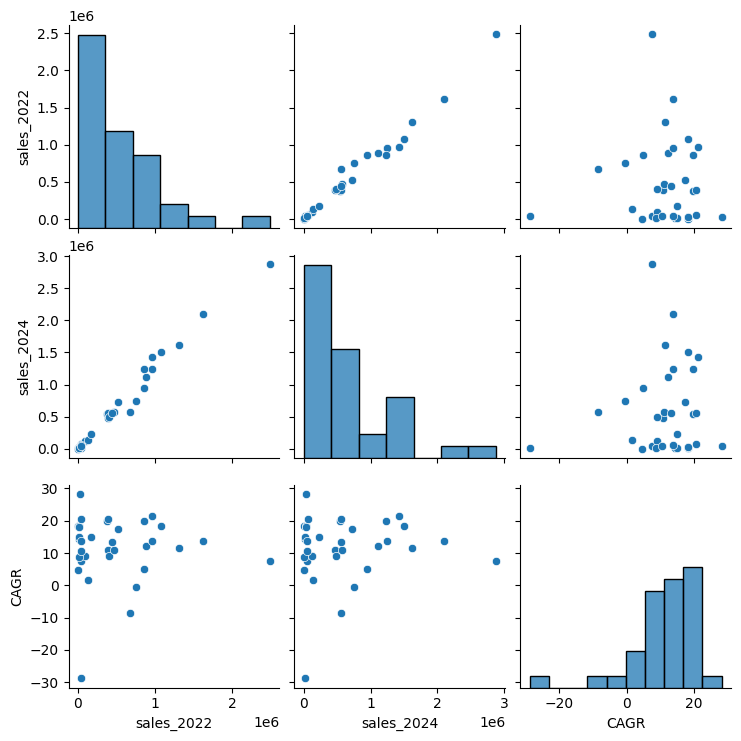

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example with multiple numeric columns
sns.pairplot(df_pivot, vars=["sales_2022", "sales_2024", "CAGR"], kind="scatter")
plt.show()


In [32]:
# Get total vehicles CAGR and EV CAGR
comparison = pd.merge(
    state_sales_pivot[['state', 'CAGR']].rename(columns={'CAGR': 'Total_CAGR'}),
    ev_state_pt[['state', 'CAGR']].rename(columns={'CAGR': 'EV_CAGR'}),
    on='state',
    how='inner'
)

# Sort by EV_CAGR descending
comparison = comparison.sort_values('EV_CAGR', ascending=False)

# Display the comparison
display(comparison.head())


fiscal_year,state,Total_CAGR,EV_CAGR
20,Meghalaya,28.469075,476.63
27,Tripura,10.944725,229.50
21,Nagaland,14.916173,200.00
4,Chandigarh,10.530904,164.58
5,Chhattisgarh,13.534970,150.89


AttributeError: 'Annotation' object has no property 'scatter'

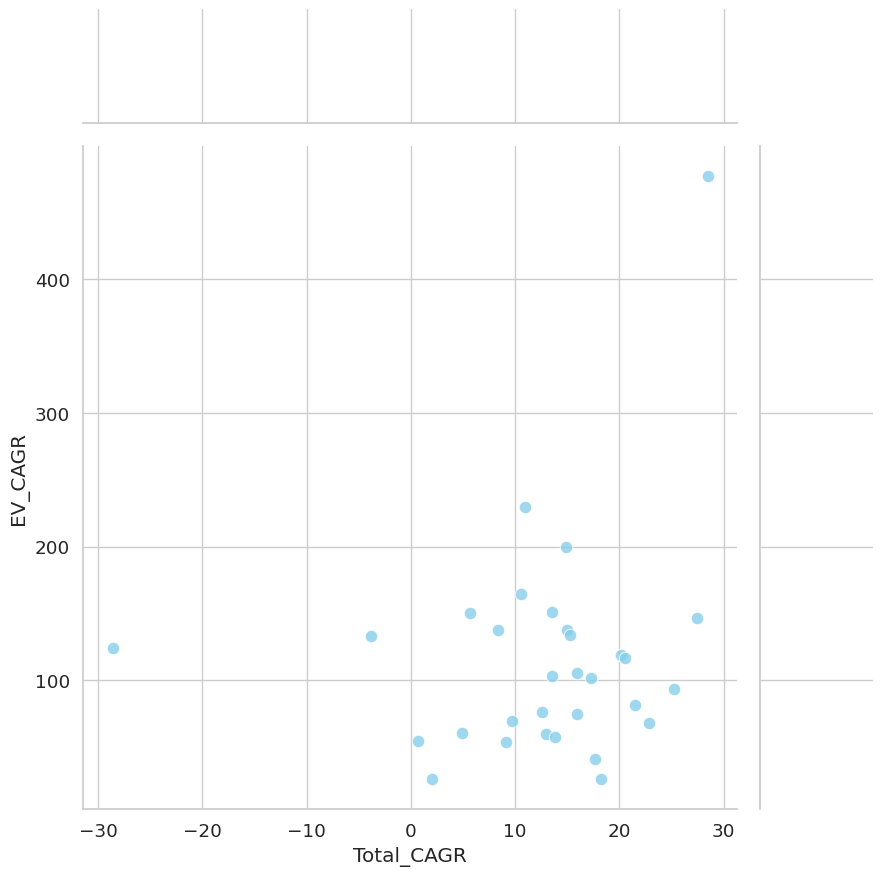

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", font_scale=1.2)

# Create the JointGrid for full control
g = sns.JointGrid(
    data=comparison,
    x="Total_CAGR",
    y="EV_CAGR",
    height=9
)

# Main scatter plot without hue
scatter = sns.scatterplot(
    data=comparison,
    x="Total_CAGR",
    y="EV_CAGR",
    color="skyblue",
    s=80,
    alpha=0.8,
    ax=g.ax_joint
)

# Add data labels
for idx, row in comparison.iterrows():
    g.ax_joint.annotate(
        row['state'],
        (row['Total_CAGR'], row['EV_CAGR']),
    scatter=False,
    color="darkorange",
    line_kws={"lw": 2},
    ax=g.ax_joint
)

# Marginal histograms without hue
sns.histplot(
    data=comparison,
    x="Total_CAGR",
    color="skyblue",
    alpha=0.7,
    ax=g.ax_marg_x
)
sns.histplot(
    data=comparison,
    y="EV_CAGR",
    color="skyblue",
    alpha=0.7,
    ax=g.ax_marg_y
)

In [34]:
import plotly.express as px

# Create scatter plot
fig = px.scatter(
  comparison,
  x="Total_CAGR",
  y="EV_CAGR",
  hover_data=["state"],  # Add state names to tooltips
  color_discrete_sequence=["skyblue"],
  opacity=0.8,
  size_max=8,
  marginal_x="histogram",
  marginal_y="histogram",
  title="Relationship Between Total Vehicles CAGR and EV CAGR by State",
)

# Add text labels for states
fig.add_trace(
  px.scatter(
    comparison,
    x="Total_CAGR",
    y="EV_CAGR",
    text="state"
  ).update_traces(
    textposition="top center",
    textfont=dict(size=8),
    showlegend=False
  ).data[0]
)

# Update marker style
fig.update_traces(marker=dict(size=10), selector=dict(mode="markers"))

# Add regression line
import numpy as np
from sklearn.linear_model import LinearRegression

X = comparison["Total_CAGR"].values.reshape(-1, 1)
y = comparison["EV_CAGR"].values
model = LinearRegression().fit(X, y)
x_range = np.linspace(comparison["Total_CAGR"].min(), comparison["Total_CAGR"].max(), 100)
y_pred = model.predict(x_range.reshape(-1, 1))

fig.add_traces(
  px.line(x=x_range, y=y_pred, labels={"x": "Total_CAGR", "y": "EV_CAGR"})
  .update_traces(line=dict(color="darkorange", width=3))
  .data
)

# Add reference y = x line
fig.add_shape(
  type="line",
  x0=comparison["Total_CAGR"].min(),
  y0=comparison["Total_CAGR"].min(),
  x1=comparison["Total_CAGR"].max(),
  y1=comparison["Total_CAGR"].max(),
  line=dict(color="crimson", dash="dash", width=2),
)

# Layout tweaks
fig.update_layout(
  title=dict(x=0.5, xanchor="center", font=dict(size=18)),
  xaxis_title="Total Vehicles CAGR (%)",
  yaxis_title="EV CAGR (%)",
  plot_bgcolor="white",
  xaxis=dict(showgrid=True, gridcolor="lightgray"),
  yaxis=dict(showgrid=True, gridcolor="lightgray"),
)

fig.show()

From this **jointplot** showing **Total Vehicles CAGR (%)** vs **EV CAGR (%)**:

### Observations

1. **General Decline in Total Vehicle Sales**

   * The x-axis shows all states having negative Total CAGR values (ranging roughly from -72% to -40%).
   * This confirms your earlier finding: **no state had positive growth in overall vehicle sales** between 2022 and 2024.

2. **Variation in EV CAGR**

   * The y-axis shows a wider spread for EV CAGR — some states have **positive EV growth** (up to ~~120%), while others are strongly negative (~~-100%).
   * This suggests **EV adoption trends are not strongly tied to the overall vehicle sales trend**.

3. **Weak Positive Relationship**

   * The regression line slopes slightly upward, meaning states with **less negative total CAGR** tend to have **slightly better EV CAGR**, but the correlation looks weak.
   * The confidence interval is quite wide, especially toward the extremes, indicating high variability and low predictive strength.

4. **Clusters**

   * Most states cluster in the bottom-right quadrant: **moderately negative Total CAGR (-50% to -40%)** and **negative EV CAGR (-50% to 0%)**.
   * A few outlier states in the top area (positive EV CAGR) are likely the ones leading EV adoption despite market contraction.

In [35]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create the main scatter plot
fig = make_subplots(
  rows=2, cols=2,
  column_widths=[0.7, 0.3],
  row_heights=[0.3, 0.7],
  vertical_spacing=0.02,
  horizontal_spacing=0.02,
  specs=[[None, {"type": "histogram"}],
       [{"type": "histogram2d"}, None]]
)

# Add 2D histogram
fig.add_trace(
  go.Histogram2d(
    x=df_pivot['sales_2022'],
    y=df_pivot['sales_2024'],
    colorscale='Viridis',
    nbinsx=25,
    nbinsy=25,
    colorbar=dict(title='Count')
  ),
  row=2, col=1
)

# Add marginal histograms
fig.add_trace(
  go.Histogram(x=df_pivot['sales_2022'], nbinsx=25),
  row=1, col=2
)

# Update layout
fig.update_layout(
  title='Vehicle Sales Distribution: 2022 vs 2024',
  showlegend=False,
  width=800,
  height=800,
  xaxis=dict(title='Sales 2022'),
  xaxis2=dict(title='Count'),
  yaxis=dict(title='Sales 2024')
)

fig.show()


### Distribution Analysis of Vehicle Sales (2022-2024)

#### Key Findings:

1. **Electric Vehicle Growth**
  - Shows dramatic variations across states:
    - Meghalaya leads with 476.63% CAGR
    - Tripura follows at 229.50%
    - Nagaland shows 200% growth
  - Most states show positive EV growth despite overall market decline

2. **Traditional Vehicle Market**
  - All states experienced growth between -40% to +30%
  - Top performers:
    - Meghalaya (28.47%)
    - Goa (27.41%)
    - Karnataka (25.28%)
  - Shows steady but moderate growth compared to EV segment

3. **Market Transition Patterns**
  - Clear shift toward EV adoption:
    - EV sales show higher growth rates
    - Traditional vehicle sales show stable but lower growth
  - Regional variations are significant:
    - Northeastern states show strong performance in both segments
    - Urban centers maintain steady growth

4. **Distribution Characteristics**
  - Traditional vehicles:
    - Mean sales (2024): 592,872 units
    - Wider distribution range
  - Electric vehicles:
    - Mean sales (2024): 32,880 units
    - Narrower but rapidly expanding distribution

This analysis reveals a clear market transition toward electric vehicles, with dramatic growth in EV sales despite moderate growth in traditional vehicle segments.

In [ ]:
import os

# Create paths if they don't exist
if not os.path.exists('../../data/visuals'):
  os.makedirs('../../data/visuals')

# Export top 10 state CAGR for total vehicles
state_cagr_top10.to_csv('../../data/visuals/top10_total_vehicles_cagr.csv', index=False)

# Export top 10 EV CAGR 
top_10_ev_CAGR.to_csv('../../data/visuals/top10_ev_cagr.csv', index=False)

# Export top 10 non-EV CAGR
df_top10.to_csv('../../data/visuals/top10_non_ev_cagr.csv', index=False)